## Final Project Submission

Please fill out:
* Student name: Calvine Dasilver
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Nikita
* Blog post URL:


 #  Demystifying House Sales Analysis with Regression Modeling in a Northwestern County

   ## Project Overview

   ### <li>**Business Understanding**

The real estate market plays a crucial role in the economic health and stability of a region. Understanding the factors that influence house prices is essential for both buyers and sellers to navigate the market effectively. This project focuses on a specific northwestern county in the United States, aiming to shed light on the key determinants of property valuation in this area.
   ##### Problem Statements:
What are the most significant factors influencing house prices in this northwestern county?How can we quantify the relationship between these factors and property value?Can we develop a reliable model to predict house prices based on relevant characteristics?
   ##### Challenges:
* Real estate data can be complex and multifaceted, encompassing various property features and local market trends.
* Accurately identifying and quantifying the relative impact of each factor on house prices can be challenging.
* External factors like economic conditions and interest rates might also influence prices, requiring careful consideration.

##### Proposed Solutions:
We propose utilizing multiple linear regression, a powerful machine learning technique. This method allows us to analyze a large dataset of house sales and identify the statistical relationships between various property features (e.g., square footage, number of bedrooms, location) and the corresponding sale prices.
   ##### Objectives:
1. Develop a robust multiple linear regression model that accurately predicts house prices in the chosen northwestern county.
2. Identify the most significant factors influencing property value within this specific market.
3. Provide valuable insights into the housing market dynamics of the region, benefiting potential buyers, real estate agents, and other stakeholders.
   
 
**Research questions that would help to achieve the objectives**:

1. How does the number of bedrooms, bathrooms, grade and square footage of a house correlate with its sale price in King County?
2. How much can a homeowner expect the value of their home to increase after a specific renovation project?
3. Which renovation projects have the most significant impact on a home's market value in the northwestern county?
4. Are there specific combinations of renovation projects that provide an interdependent effect on a home's market value?

   ### <li> **Data Understanding**

Our analysis leverages the King County House Sales dataset - a rich resource containing over 21,500 records and 20 distinct features(columns). Spanning house sales from May 2014 to May 2015, this dataset provides a comprehensive snapshot of the King County housing market during that period.

**The King County House Sales dataset contains the following columns;**

id - unique identified for a house

date - Date house was sold 

Price - Sale price (prediction target)

bedrooms - Number of bedrooms,

bathrooms - Number of bathrooms,

sqft_living - Square footage of living space in the home,

sqft_lot - Square footage of the lot,

floors - Number of floors (levels) in house,

view - Quality of view from house,

condition - How good the overall condition of the house is. Related to maintenance of house,

grade - Overall grade of the house. Related to the construction and design of the house,

sqft_above - Square footage of house apart from basement,

sqft_basement - Square footage of the basement,

yr_built - Year when house was built,

yr_renovated - Year when house was renovated,

zipcode - ZIP Code used by the United States Postal Service,

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors,

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors, and

sell_yr - Date house was sold.


We need to be aware of certain constraints within the data, as these might influence our analysis and interpretation of the results. From the sources;

1. The data may contain anomalies or inconsistencies that require careful examination during analysis. For instance, a record lists a house with 33 bedrooms, which appears to be an outlier

2. It's important to consider the time frame of the data (May 2014 - May 2015) as it may not fully capture the current market dynamics in King County.
3. It's important to acknowledge the scope of the data. While it provides details on house features, it may not capture external factors such as interest rates or the overall economic climate, which can also play a role in determining property values.

### <li>**Data Preparation**

In [335]:
import csv
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import OLS
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder

In [336]:
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [337]:
def columns(data):
     return data.columns

columns(df)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [338]:
#checking on data information
def info(data):
     return data.info()
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [356]:
# checking the number of rows and columns
def shape(data):
     return data.shape

shape(df)


(15675, 22)

In [339]:
#checking null values
def null(data):
    return data.isna().sum()
null(df)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [357]:
# Deleting rows with null values
def dropna(data):
    return data.dropna(subset=['view','waterfront','yr_renovated'])
dropna(df)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sell_yr,house_age
0,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63
1,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49
2,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28
3,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,3,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,2014,13
4,1321400060,257500.0,3,2.25,1715,6819,2.0,NO,NONE,3,...,?,1995,0.0,98003,47.3097,-122.327,2238,6819,2014,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15670,2997800021,475000.0,3,2.50,1310,1294,2.0,NO,NONE,3,...,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,2015,7
15671,263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,3,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2014,5
15672,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,3,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2015,1
15673,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,3,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2014,5


In [359]:
# checking for non-numeric columns
def count_null(data):
    return data.isnull().sum()

count_null(df)


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sell_yr          0
house_age        0
dtype: int64

In [360]:
# checking for duplicates
def count_duplicate(data):
      return data.duplicated().sum()
count_duplicate(df)

0

In [361]:
#statistical summary
def describe(data):
     return data.describe()
describe(df)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sell_yr,house_age
count,1.567500e+04,1.567500e+04,15675.000000,15675.000000,15675.000000,1.567500e+04,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000
mean,4.593765e+09,5.414864e+05,3.377544,2.122089,2086.087018,1.529459e+04,1.496619,3.411356,1794.411292,1971.167400,82.645550,98077.485486,47.559211,-122.213407,1991.331356,12911.563955,2014.318596,43.151196
std,2.875479e+09,3.726147e+05,0.904799,0.766753,918.775098,4.189762e+04,0.539692,0.651339,828.834082,29.352194,397.691726,53.367483,0.138651,0.140764,684.180734,28037.987985,0.465947,29.352960
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,2014.000000,-1.000000
25%,2.126049e+09,3.210000e+05,3.000000,1.750000,1430.000000,5.044500e+03,1.000000,3.000000,1200.000000,1952.000000,0.000000,98033.000000,47.469250,-122.328000,1490.000000,5100.000000,2014.000000,17.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.600000e+03,1.500000,3.000000,1570.000000,1975.000000,0.000000,98065.000000,47.571100,-122.229000,1850.000000,7620.000000,2014.000000,39.000000
75%,7.334501e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.071800e+04,2.000000,4.000000,2220.000000,1997.000000,0.000000,98117.000000,47.677350,-122.124000,2370.000000,10102.500000,2015.000000,63.000000
max,9.895000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,115.000000


statistical summary observation count for each column is 15,762 this shows that we dont have missing values. The mean value of the house price is USD 5,413,172 while the minimum house price is USD 82,000 and maximum house price is USD 7,700,000 The standard deviation of the house price stands at USD 3,722,258

In [345]:
#converting date to datetime format
df['date']=pd.to_datetime(df['date'])
#extracting year from date column
df.date=df['date'].dt.year
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [346]:
# Creating a new column for sell year
df['sell_yr'] = pd.to_datetime(df['date'],format='%Y').dt.year
df.drop(columns='date', inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sell_yr
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,2014
6,1321400060,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,...,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,2014


In [347]:
#creating column house age at year of sale
df['house_age']=df['sell_yr']-df['yr_built']
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sell_yr,house_age
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,2014,13
6,1321400060,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,...,?,1995,0.0,98003,47.3097,-122.327,2238,6819,2014,19


In [348]:
#transformation of categorical values 'condition' column
df['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sell_yr,house_age
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,3,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,2014,13
6,1321400060,257500.0,3,2.25,1715,6819,2.0,NO,NONE,3,...,?,1995,0.0,98003,47.3097,-122.327,2238,6819,2014,19


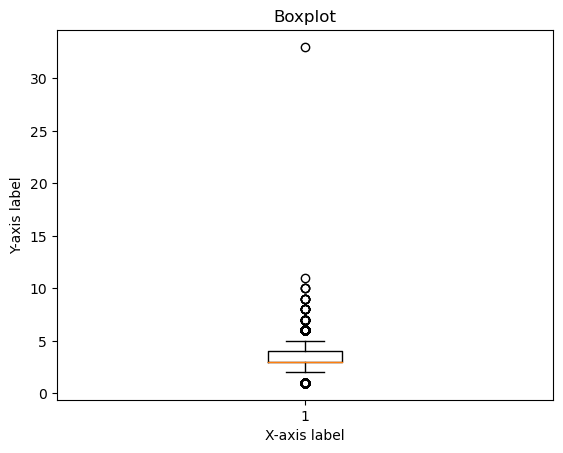

In [349]:
# checking for outliers

# Creating a boxplot
plt.boxplot(df["bedrooms"])

# Adding labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Boxplot')

# Display the plot
plt.show()


According to the above visualization, the bedroom data has an outlier of 33.So we are going to delete rows where 'bedrooms' column has value 33

In [350]:
# Delete rows where 'bedrooms' column has value 33
df = df[df['bedrooms'] != 33]

# Reset index if needed
df.reset_index(drop=True, inplace=True)

### <li>**Exploratory Data Analysis**

In this section, we will perform exploratory data analysis (EDA) to understand the data better and discover any patterns, trends using univariate,bivariate and multivariate analysis

We will use descriptive statistics and visualizations to summarize the main characteristics of the data and examine the relationships between the features and the target variable.

We will also check the distribution and correlation of the variables and identify any potential problems or opportunities for the analysis.

Univariate Analysis

Univariate analysis involves the examination of single variables.We focus in the summary statistics of target variable-price to help us undersatand the distribution and skewness of house prices

Basic Statistics of Price:
 count    1.567500e+04
mean     5.414864e+05
std      3.726147e+05
min      8.200000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


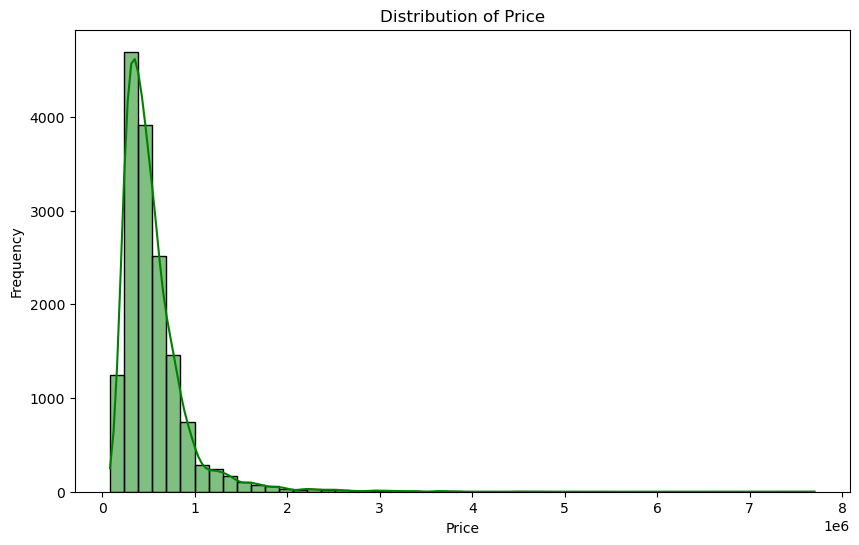

In [351]:
# Display summary statistics of the 'price' variable
price_stats = df['price'].describe()
print("Basic Statistics of Price:\n", price_stats)

# Visualizing the distribution of 'price' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='green')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the distribution of house price is positively skewed suggesting that while most houses are concentrated around lower prices, there are some properties with significantly higher prices.

Bivariate Analysis

In this section, we will perform bivariate analysis to examine the relationship between the target variable - price and the other numeric and continuous features in the data. We will use scatter plots to show the direction, strength, and shape of the relationship between two numeric variables. This will help us understand how one variable affects or is affected by another variable and identify any patterns or trends that may exist.

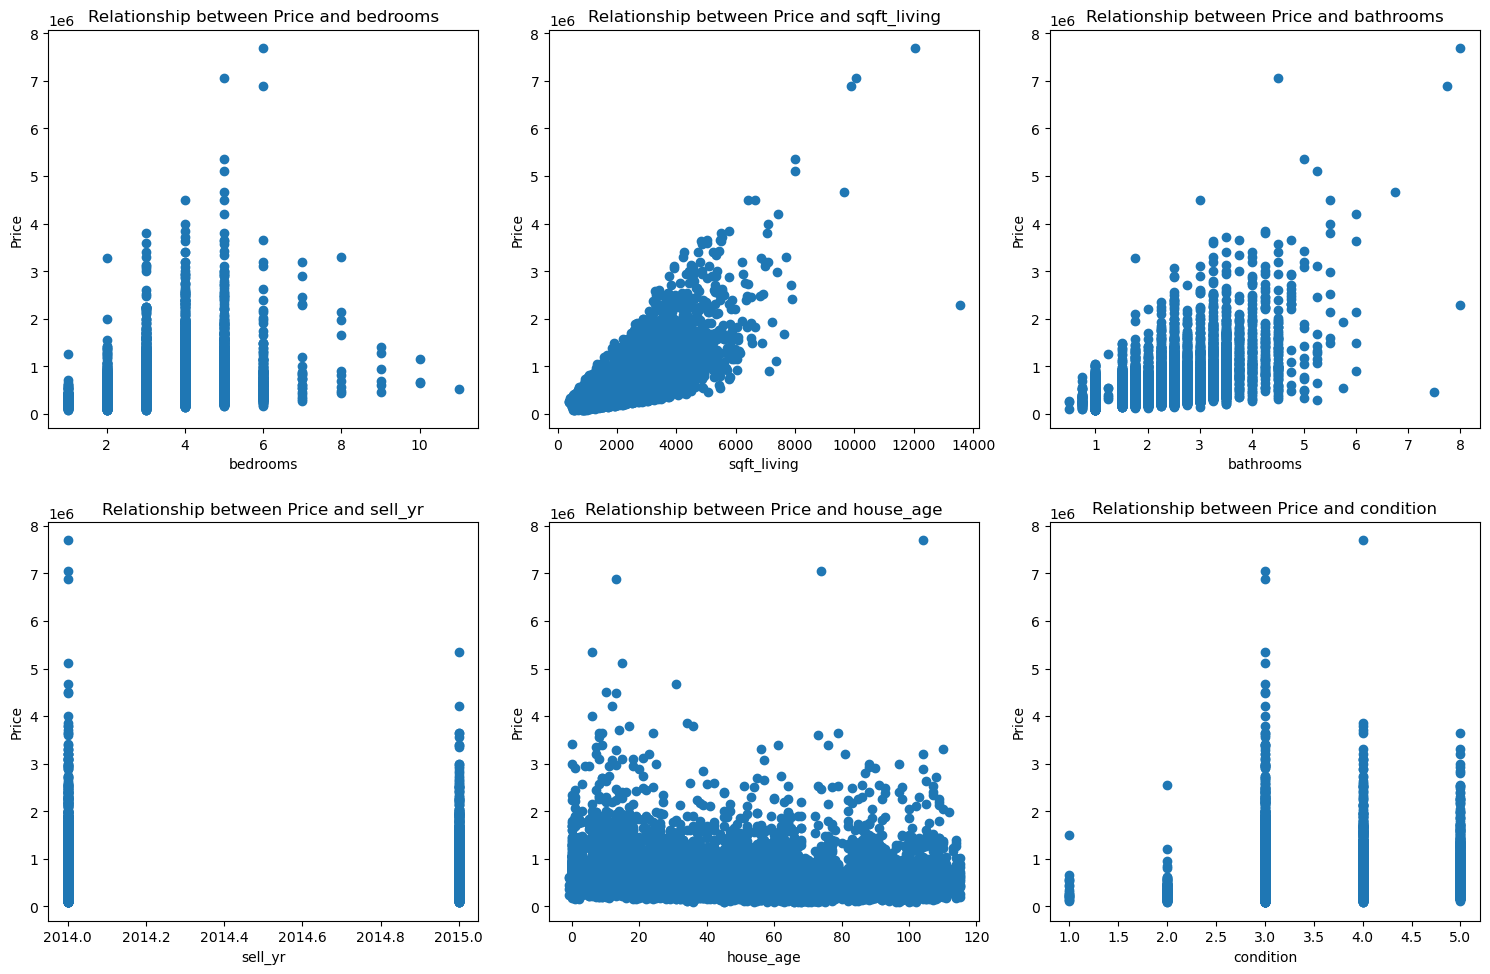

In [352]:
#relationships between our target variable and other independent variables in the dataset
import math
variables = ['bedrooms','sqft_living','bathrooms','sell_yr','house_age','condition']
num_rows = math.ceil(len(variables) / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(df[var],df['price'])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_title(f'Relationship between Price and {var}')

plt.tight_layout()
plt.show()

The scatter plots show that there is a positive relationship between most of the independent variables and the price of a house. This means that houses with higher values for these variables tend to be more expensive

Multivariate Analysis

In this section, we will perform multivariate analysis to examine the relationship between the target variable - price and multiple features in the data. We will use heatmap to visualize the correlation matrix of the features and see how they are related to each other and to the price.

A heatmap can show us the strength and direction of the correlation between two variables using different colors and shades. This will help us identify the most important features for the prediction and avoid multicollinearity problems.

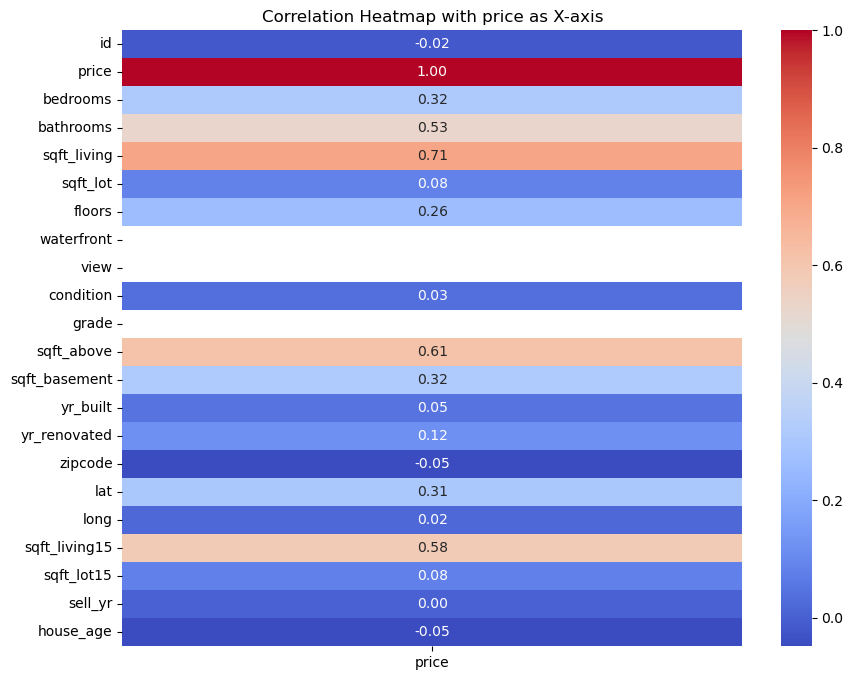

In [353]:
import numpy as np

# Replace non-numeric values with NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Create a correlation matrix
corr_matrix = df_numeric.corr()

# Select only 'sale_value' as x-axis
corr_sale_value = corr_matrix[['price']]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_sale_value, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap with price as X-axis')
plt.show()


Positive correlations are typically represented by shades of red, and negative correlations by shades of blue.
We note that bathrooms and sqft_living are highly positively correlated.

RECCOMENDATIONS

From the three types of analysis performed I reccomend the following;
1.Under univariate analysis,consider the house prices since most of the prices are relatively low.
2.Under bivariate analysis,most independent variables such as sell year, house age, bathrooms and bedrooms influence the house price.
3.Under multivariate analysis,bathrooms and square foot living are the most independent variables that affect the house price.